# Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, uniform

## Simulation: Grid Approximation


We've flip a coin 100 times

 1. Identify your hypotheses.
 2. Express your belief that each hypothesis is true in terms of prior probabilities.

 4. Determine the likelihood of the observed data under each hypothesis.
 5. Use Bayes’ Theorem to compute the posterior probabilities for each hypothesis

## Answer 

- What is the probability of getting 75 heads in 100 flips?

In [10]:
# Define the range of number of heads and head probabilities
num_heads = np.arange(0, 101, 1) # We don't know nothing about the coin 
head_prob = np.arange(0, 1.01, 0.01) # Prior knwowledge about the coin probability of heads

num_heads,head_prob

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.6

In [12]:
len(num_heads)*len(head_prob) # 101*101 = 10201 possible combinations of heads and head probabilities

10201

In [13]:
# Create a DataFrame with all combinations of num_heads and head_prob " WE DON'T KNOW ANYTHING ABOUT THE COIN"
coin = pd.DataFrame([(x, y) for x in num_heads for y in head_prob], columns=["num_heads", "head_prob"])

In [14]:
coin

,num_heads,head_prob
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04
...,...,...
10196,100,0.96
10197,100,0.97
10198,100,0.98
10199,100,0.99


In [15]:
# Calculate prior, likelihood, and posterior probabilities
coin["prior"] = uniform.pdf(coin["head_prob"]) # Since we don't know anything about the coin, we assume a uniform prior over the head probabilities

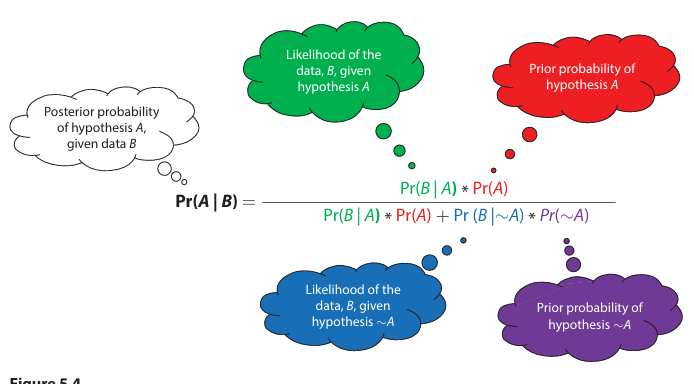

In [26]:
coin["likelihood"] = binom.pmf(coin["num_heads"], 100, coin["head_prob"])
coin["posterior_prob"] = coin["prior"] * coin["likelihood"]
coin["posterior_prob"] /= coin["posterior_prob"].sum()

In [27]:
# Prior como não sei nada sobre a moeda, assumo uma distribuição uniforme para as probabilidades de cabeça
# Ou seja cada um das combinações aconteceram uma vez, ou seja, 1/101 para cada combinação de probabilidade de cabeça e número de cabeças
coin

,num_heads,head_prob,prior,likelihood,posterior_prob
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.366032,0.003624
2,0,0.02,1.0,0.132620,0.001313
3,0,0.03,1.0,0.047553,0.000471
4,0,0.04,1.0,0.016870,0.000167
...,...,...,...,...,...
10196,100,0.96,1.0,0.016870,0.000167
10197,100,0.97,1.0,0.047553,0.000471
10198,100,0.98,1.0,0.132620,0.001313
10199,100,0.99,1.0,0.366032,0.003624


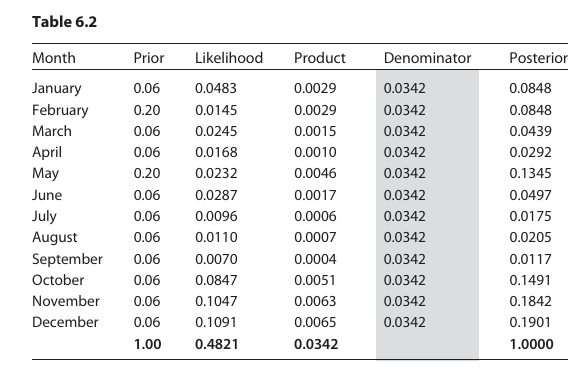

In [30]:
heads75 = coin[coin["num_heads"] == 75]
heads75

,num_heads,head_prob,prior,likelihood,posterior_prob
7575,75,0.00,1.0,0.000000e+00,0.000000e+00
7576,75,0.01,1.0,1.886367e-127,1.867690e-129
7577,75,0.02,1.0,5.529016e-105,5.474273e-107
7578,75,0.03,1.0,6.888644e-92,6.820439e-94
7579,75,0.04,1.0,1.247459e-82,1.235108e-84
...,...,...,...,...,...
7671,75,0.96,1.0,1.278170e-13,1.265515e-15
7672,75,0.97,1.0,2.092463e-16,2.071745e-18
7673,75,0.98,1.0,1.788347e-20,1.770641e-22
7674,75,0.99,1.0,1.141263e-27,1.129964e-29


In [32]:
heads75['likelihood'].sum() # For each hypothesis the probability approximates to 1.0 (theoretically, it should be 1.0)

np.float64(0.9900990099009895)

In [ ]:
# 

In [ ]:
# Generate 1000 tosses
tosses = np.random.binomial(1, 0.5, size=1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, shade=True, label="heads probability")
plt.show()

In [56]:
def get_heads_prob(tosses):
    """
    Function to estimate the heads probability from flips of a coin observations
    """
    # Calculate the number of heads
    num_heads = np.sum(tosses)
    
    return np.random.beta(num_heads + 1, len(tosses) - num_heads + 1, size=10000)

In [53]:
tosses = np.random.binomial(1, .5, size=1000000)

C:\Users\rodri\AppData\Local\Temp\ipykernel_15616\3704194973.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob, shade=True, label="heads probability")


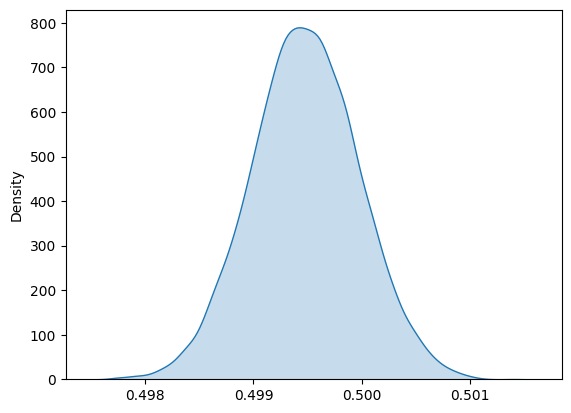

In [59]:
# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, shade=True, label="heads probability")
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_15616\1538969286.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob, shade=True, label="heads probability")


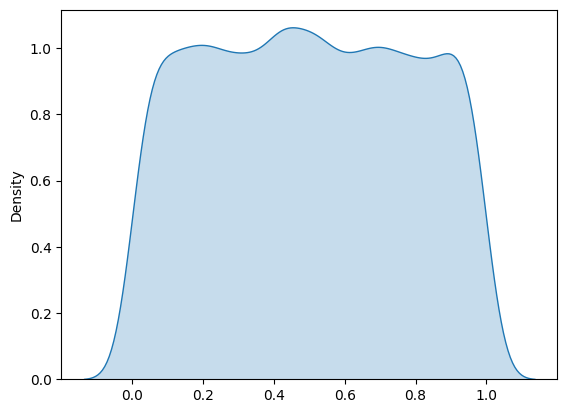

In [58]:
# Estimate the heads probability
heads_prob = get_heads_prob([])

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, shade=True, label="heads probability")
plt.show()